# Predict the moratatily status for breast cancer patients

## 1. Import libraries

In [1]:
# --------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split

# Import models ------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import metrics -----------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# --------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Import imblearn ----------------------------------
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

## 2. Read dataset from CSV

In [2]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/CleanCourseworkData.csv')
data = pd.read_csv('CleanCourseworkData.csv')
data.head(15)

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,0,0,0,1,3,0,4,0,0,24,1,60,0
1,50,1,1,2,0,2,0,35,0,0,14,5,62,0
2,58,2,2,4,0,2,0,63,0,0,14,7,75,0
3,58,0,0,0,1,3,0,18,0,0,2,1,84,0
4,47,1,0,1,1,3,0,41,0,0,3,1,50,0
5,51,0,0,0,0,2,0,20,0,0,18,2,89,0
6,51,0,0,0,3,1,0,8,0,0,11,1,54,0
7,40,1,0,1,0,2,0,30,0,0,9,1,14,1
8,40,3,2,4,1,3,0,103,0,0,20,18,70,0
9,69,3,2,4,3,1,1,32,0,0,21,12,92,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4007 non-null   int64
 1   T_Stage                 4007 non-null   int64
 2   N_Stage                 4007 non-null   int64
 3   6th_Stage               4007 non-null   int64
 4   Differentiated          4007 non-null   int64
 5   Grade                   4007 non-null   int64
 6   A_Stage                 4007 non-null   int64
 7   Tumor_Size              4007 non-null   int64
 8   Estrogen_Status         4007 non-null   int64
 9   Progesterone_Status     4007 non-null   int64
 10  Regional_Node_Examined  4007 non-null   int64
 11  Reginol_Node_Positive   4007 non-null   int64
 12  Survival_Months         4007 non-null   int64
 13  Mortality_Status        4007 non-null   int64
dtypes: int64(14)
memory usage: 438.4 KB


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## 3. Extracting feature coloumns for the prediction

In [6]:
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Features
X = data[feature_cols]
y = data['Mortality_Status']
print(feature_cols)

['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


## 4. Balancing the data for an accurate prediction

The SMOTE algorithm randomly selects a minority class instance A and finds its K nearest minority class neighbors. Then it creates a synthetic instance B by ramdomly choosing one of the K nearest neighbors and connects A to B.  
All synthetic instances are generated as a combination of the 2 selacted instances A and B.  
*More details in **"Imbalanced Learning: Foundations, Algorithms and Applications, 2013"** or [SMOTE Imbalance Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).*

In [ ]:
# numbers before SMOTE
num_before = dict(Counter(y))

# now, lets do SMOTE
over = SMOTE(sampling_strategy = 0.9)   #consider 90% from the data
under = RandomUnderSampler(sampling_strategy = 0.9)
pipeline_steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = pipeline_steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

# numbers after SMOTE
num_after = dict(Counter(y_smote))

# Keeping the original values
X_orig = X.copy()
y_orig = y.copy()

print(num_before, num_after)
X = X_smote
y = y_smote

{0: 3393, 1: 614} {0: 3392, 1: 3053}


## 5. Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

## 6. Models

We'll train  and test 3 models:
- Logistic Regression
- K-nearest Neighbors (KNN)
- Naive Bayes (NB)

We will establish the better predictor by analyzing the Confussion Matrix:
- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)  

Based on them, there are 4 indicators that allow us to conclude the best prediction model.  

| Index  | Formula  | Description  |
|:-----|:-----:|:-------|
|**Accuracy**| ACC = (TP + TN) / (TP + TN + FP + FN) | Meaning: There is **ACC %** risk of death.|
|**Recall**| TPR = TP / (TP + FN) | **True positive rate** Meaning: It correctly identifies **TPR %** of all death risks.|
|**Precission**| P = TP / (TP + FP) | Meaning: When it predicts a risk, it is correct **P %** of the time.|
|**F1-Score**| F1 = TP / (TP + (FP + FN) / 2) | The harmonic mean of precission and recall.|

### 6.1. Logistic Regression

Logistic regression is a statistical model used for binary classification. It predicts the probability of a class label by applying the logistic function to a linear combination of input features.

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Display the actual vs predicted values

In [ ]:
y_pred_train=logreg.predict(X_train)
y_pred=logreg.predict(X_test)
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
1306,0,0
3506,0,0
188,0,0
6272,1,0
2790,0,1
...,...,...
2904,1,0
2900,0,0
4214,1,0
735,1,0


Confustion matrix

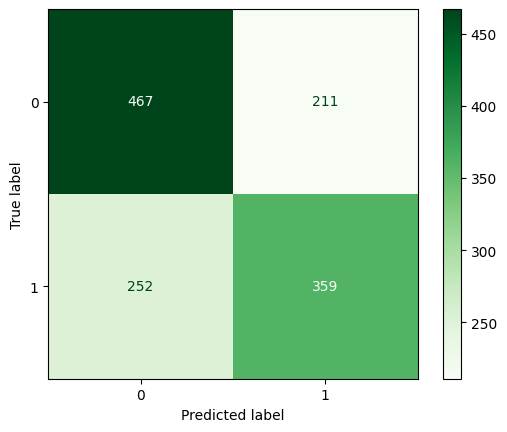

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
disp.plot(cmap='Greens')

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       678
           1       0.63      0.59      0.61       611

    accuracy                           0.64      1289
   macro avg       0.64      0.64      0.64      1289
weighted avg       0.64      0.64      0.64      1289



ROC curve estimator

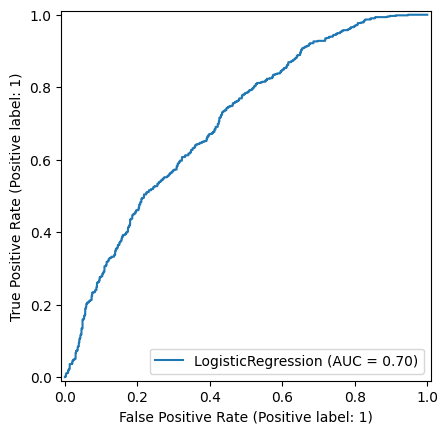

In [ ]:
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

### 6.2. K-Nearest Neighbours

In *knn classification*, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. In *knn regression*, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Display the actual vs predicted values

In [ ]:
y_pred_train=knn.predict(X_train)
y_pred=knn.predict(X_test)
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
1306,0,0
3506,0,0
188,0,0
6272,1,1
2790,0,1
...,...,...
2904,1,1
2900,0,1
4214,1,1
735,1,1


Confustion matrix

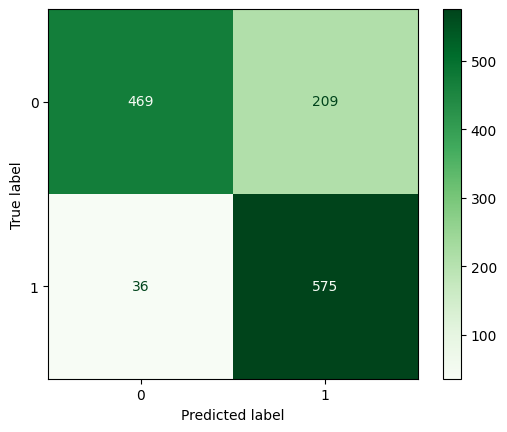

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot(cmap='Greens')

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       678
           1       0.73      0.94      0.82       611

    accuracy                           0.81      1289
   macro avg       0.83      0.82      0.81      1289
weighted avg       0.84      0.81      0.81      1289



ROC curve estimator

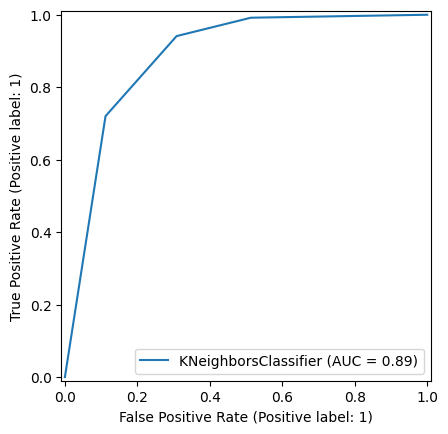

In [ ]:
knn = RocCurveDisplay.from_estimator(knn, X_test, y_test)

### 6.3. Gaussian Naive Bayes

Calculates the probability of different classes given the features of a dataset. It assumes that the features are conditionally independent, which is why it's called "naive." It’s fast, easy to implement, and works well with large datasets.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Display the actual vs predicted values

In [ ]:
y_pred_train=nb.predict(X_train)
y_pred=nb.predict(X_test)
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
1306,0,0
3506,0,0
188,0,0
6272,1,0
2790,0,1
...,...,...
2904,1,0
2900,0,0
4214,1,0
735,1,0


Confustion matrix

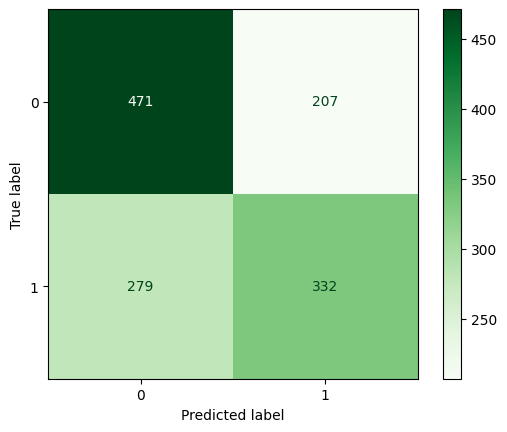

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = nb.classes_)
disp.plot(cmap='Greens')

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       678
           1       0.62      0.54      0.58       611

    accuracy                           0.62      1289
   macro avg       0.62      0.62      0.62      1289
weighted avg       0.62      0.62      0.62      1289



ROC curve estimator

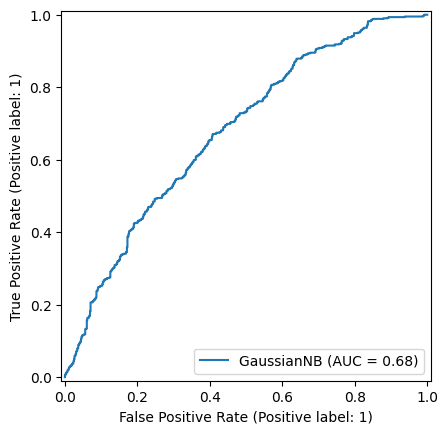

In [ ]:
nb = RocCurveDisplay.from_estimator(nb, X_test, y_test)

### 6.4. Tuning the hyperparameters for the best performing model (KNN)
[Tuning the hyperparameters](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)

In [ ]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}


pipe = Pipeline(steps=[
        ('normalization', MinMaxScaler()),
        ('oversampling', SMOTE(sampling_strategy=0.9)),
        ('classifier', KNeighborsClassifier())
])

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_orig, y_orig)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('normalization', MinMaxScaler()),
                                       ('oversampling',
                                        SMOTE(sampling_strategy=0.9)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

Confustion matrix

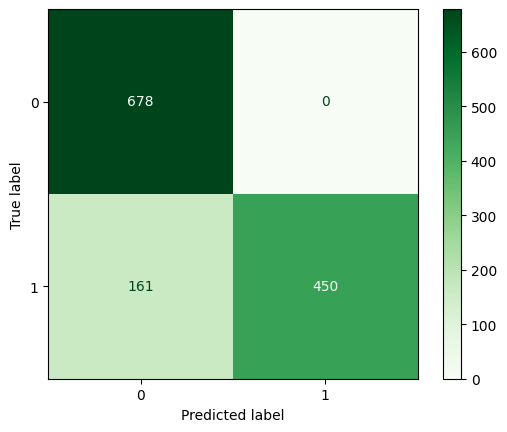

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_knn.classes_)
disp.plot(cmap='Greens')

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       678
           1       1.00      0.74      0.85       611

    accuracy                           0.88      1289
   macro avg       0.90      0.87      0.87      1289
weighted avg       0.90      0.88      0.87      1289



ROC curve estimator

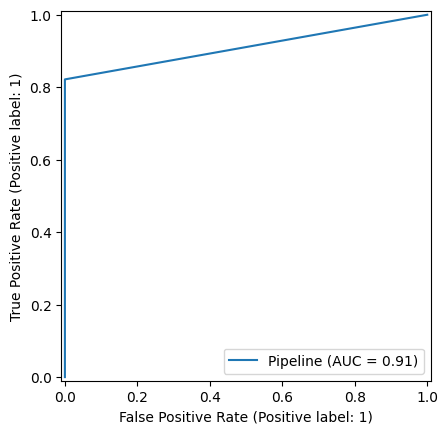

In [ ]:
knn = RocCurveDisplay.from_estimator(best_knn, X_test, y_test)